<a href="https://colab.research.google.com/github/githubtaniya924/BigData-Practicals/blob/main/BD_Practical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
data = pd.read_csv('Flight_Data.csv')

In [144]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [145]:
data.shape

(10683, 11)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [147]:
data[data['Total_Stops'].isnull()] #the row which consist of null values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [148]:
data.dropna(inplace=True) #drop the row which consist of null value

In [149]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [150]:
#Find the data type of all the features
data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [151]:
#derive features from Date_of_Journey, dep_time, arrival_time, duration but before that we need to convert the string type it date-time datatype

def change_into_datetime(col):
  data[col]= pd.to_datetime(data[col])

In [152]:
for features in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
  change_into_datetime(features)

/tmp/ipython-input-3136628845.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col]= pd.to_datetime(data[col])
/tmp/ipython-input-3136628845.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]= pd.to_datetime(data[col])
/tmp/ipython-input-3136628845.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]= pd.to_datetime(data[col])


In [153]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [154]:
data1 = pd.DataFrame()

In [155]:
#Feature Engineering

#Date_of_Journey
data['journey_day'] = data['Date_of_Journey'].dt.day

data['journey_month'] = data['Date_of_Journey'].dt.month

data['journey_year'] = data['Date_of_Journey'].dt.year

In [156]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-29 05:50:00,2026-01-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-29 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2026-01-29 18:05:00,2026-01-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2026-01-29 16:50:00,2026-01-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [157]:

def timeExtraction(df,cols):
  data[cols+'_hour'] = data[cols].dt.hour
  data[cols+'_min'] = data[cols].dt.minute
  return data

timeExtraction(data,'Arrival_Time')
timeExtraction(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-29 05:50:00,2026-01-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-29 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2026-01-29 18:05:00,2026-01-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2026-01-29 16:50:00,2026-01-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2026-01-29 19:55:00,2026-01-29 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2026-01-29 20:45:00,2026-01-29 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2026-01-29 08:20:00,2026-01-29 11:20:00,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2026-01-29 11:30:00,2026-01-29 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [158]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [159]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-29 05:50:00,2026-01-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [160]:
def preprocess(x):
    x = x.strip()
    if 'h' not in x:
        x = '0h' + " " + x
    elif 'm' not in x:
        x = x + " " + '0m'
    return x

# Apply the function to the 'Duration' column
data['Duration'] = data['Duration'].apply(preprocess)



In [161]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-29 05:50:00,2026-01-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-29 09:25:00,2026-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2026-01-29 18:05:00,2026-01-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5


In [162]:
#string slicing
# lamba function is used to extract the hour amd mins and store in two different columns
data['duration_hour'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][:-1])) #"h" is not considered only the numberic value is considered
data['duration_min'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][:-1]))  #"m" is not considered only the numberic value is considered

In [163]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,duration_hour,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-29 05:50:00,2026-01-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-29 09:25:00,2026-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0


## Part - 2

In [164]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [165]:
#using one hot encoding
data = pd.get_dummies(data, columns=['Source'], drop_first=True, dtype=int) #dtype->int (id not written the result will be in boolean)


In [166]:
data.head()

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,duration_hour,duration_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,2019-03-24,New Delhi,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,1,10,22,20,2,50,0,0,0,0
1,Air India,2019-05-01,Banglore,CCU → IXR → BBI → BLR,2026-01-29 05:50:00,2026-01-29 13:15:00,7h 25m,2 stops,No info,7662,...,13,15,5,50,7,25,0,0,1,0
2,Jet Airways,2019-06-09,Cochin,DEL → LKO → BOM → COK,2026-01-29 09:25:00,2026-06-10 04:25:00,19h 0m,2 stops,No info,13882,...,4,25,9,25,19,0,0,1,0,0
3,IndiGo,2019-05-12,Banglore,CCU → NAG → BLR,2026-01-29 18:05:00,2026-01-29 23:30:00,5h 25m,1 stop,No info,6218,...,23,30,18,5,5,25,0,0,1,0
4,IndiGo,2019-03-01,New Delhi,BLR → NAG → DEL,2026-01-29 16:50:00,2026-01-29 21:35:00,4h 45m,1 stop,No info,13302,...,21,35,16,50,4,45,0,0,0,0


In [167]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'journey_day', 'journey_month', 'journey_year', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Dep_Time_hour', 'Dep_Time_min', 'duration_hour',
       'duration_min', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai'],
      dtype='object')

In [168]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [169]:
#Target label Enncoding on airlines
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [170]:
#Dictionary/list Comprehension
#enumerate -> to assign indexes. output of enumerate function: 0:'indigo', 1:'vistara'
dict1 = {key:index for index,key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [171]:
#Using Regression - R-square value (whenever the price chages the prediction also changes)
data['Airline'] = data['Airline'].map(dict1)

In [172]:
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


Text(0, 0.5, 'Price')

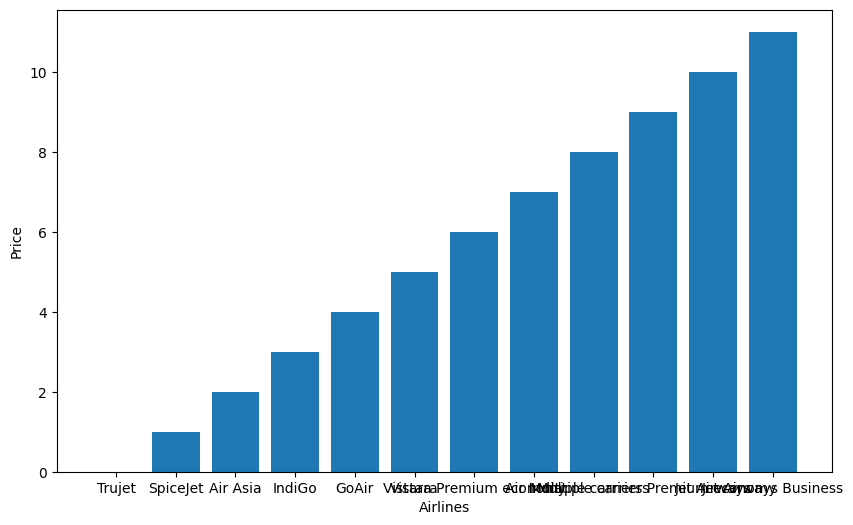

In [173]:
#graph representation Airlines vs price
plt.figure(figsize=(10,6))
plt.bar(list(dict1.keys()),list(dict1.values()))
plt.xlabel('Airlines')
plt.ylabel('Price')

In [174]:
#Using Target label encoding on Destination
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [175]:
#Dictionary/list Comprehension
#enumerate -> to assign indexes. output of enumerate function: 0:'indigo', 1:'vistara'
dict2 = {key:index for index,key in enumerate(destination,0)}
dict2

{'Kolkata': 0,
 'Hyderabad': 1,
 'Delhi': 2,
 'Banglore': 3,
 'Cochin': 4,
 'New Delhi': 5}

In [176]:
data['Destination'] = data['Destination'].map(dict2)

In [177]:
data['Destination']

,Destination
0,5
1,3
2,4
3,3
4,5
...,...
10678,3
10679,3
10680,2
10681,5


Text(0, 0.5, 'Price')

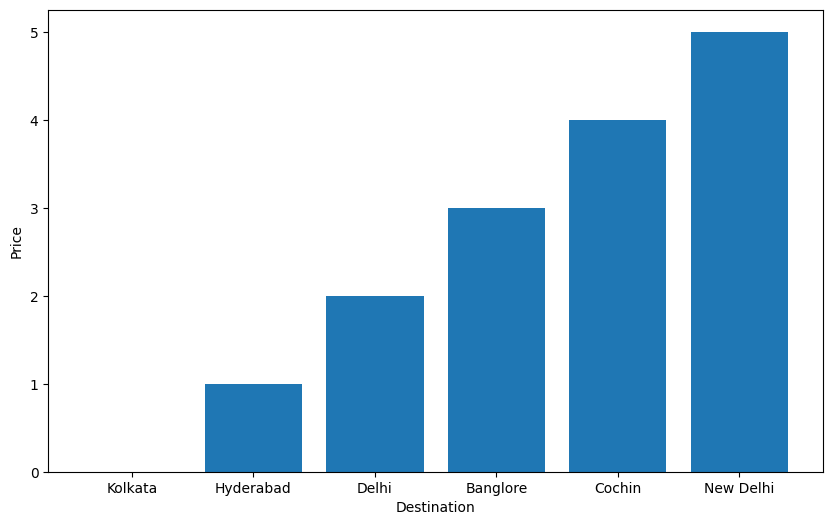

In [178]:
#graph representation Airlines vs price
plt.figure(figsize=(10,6))
plt.bar(list(dict2.keys()),list(dict2.values()))
plt.xlabel('Destination')
plt.ylabel('Price')

In [179]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [180]:
#encoding - Total_Stops
stops = {'non-stop':4, '2 stops':3, '1 stop':2, '3 stops':1, '4 stops':0}

In [181]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [182]:
data['Total_Stops']

,Total_Stops
0,4
1,3
2,3
3,2
4,2
...,...
10678,4
10679,4
10680,4
10681,4


In [183]:
data.head(1)

,Airline,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,duration_hour,duration_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2019-03-24,5,BLR → DEL,2026-01-29 22:20:00,2026-03-22 01:10:00,2h 50m,4,No info,3897,...,1,10,22,20,2,50,0,0,0,0


In [184]:
#drop the unnecessary column
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration', 'Route', 'Additional_Info'],axis=1,inplace=True)

In [185]:
data.head(1)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,duration_hour,duration_min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,5,4,3897,24,3,2019,1,10,22,20,2,50,0,0,0,0


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [187]:
#split the features and target variable
x = data.drop('Price',axis=1)
y = data['Price']


In [188]:
#split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [189]:
ml_model = RandomForestRegressor()
model = ml_model.fit(x_train,y_train)

In [190]:
y_predict = model.predict(x_test)

In [191]:
y_predict

array([16794.72      ,  5425.19      ,  8793.51      , ...,
        6631.63      , 12751.85333333, 13071.10857143])

In [192]:
print(r2_score(y_test,y_predict))

0.8003302127955265
